In [31]:
import numpy as np
from numpy.linalg import inv,matrix_rank,det
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### (i)

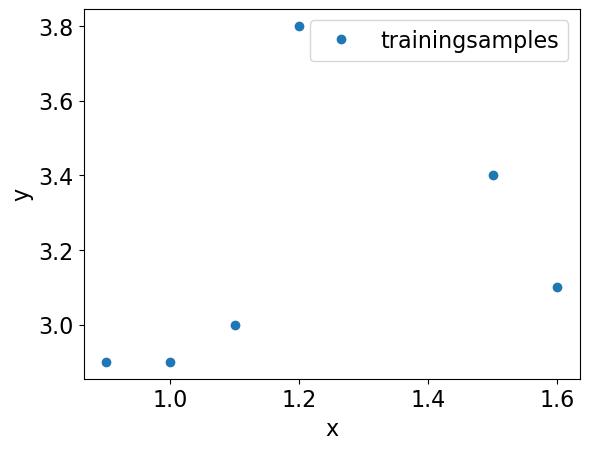

In [32]:
# Training data
X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]]) # size 6x2
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])

# Plot training data
plt.plot(X, y, 'o', label = 'trainingsamples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [33]:
# Augment 1 for bias/offset term
order = 1
linear = PolynomialFeatures(order) #creates an object that knows how to transform your data
X_linear = linear.fit_transform(X) # Actually generates polynomial features
X_linear

array([[1. , 1.6],
       [1. , 1.5],
       [1. , 1. ],
       [1. , 1.1],
       [1. , 1.2],
       [1. , 0.9]])

In [34]:
# check if X^T * X is invertible
def check_inverse_rank(matrix):
    rank = matrix_rank(matrix)
    print("matrix rank is : "+ str(rank))
    print("matrix size is : "+ str(matrix.shape))

    if matrix.shape[0] == matrix.shape[1]:
       if rank == matrix.shape[0]:
           print("matrix is invertible")
       else:
           print("matrix is not invertible")
    else:
       print("matrix is not square, hence not invertible")

    return (rank == matrix.shape[0]) and (matrix.shape[0] == matrix.shape[1])

def check_inverse_det(matrix):
    deter = det(matrix)
    print("determinant is : " + str(deter))
    if deter != 0:
        print("matrix is invertible")
    else:
        print("matrix is not invertible")

check_inverse_rank(X_linear.T @ X_linear)
check_inverse_det(X_linear.T @ X_linear)

matrix rank is : 2
matrix size is : (2, 2)
matrix is invertible
determinant is : 2.3300000000000143
matrix is invertible


In [35]:
# learning (work out w)

w_linear = inv(X_linear.T @ X_linear) @ X_linear.T @ y
print("w_linear is : " + str(w_linear))

w_linear is : [2.58283262 0.49356223]


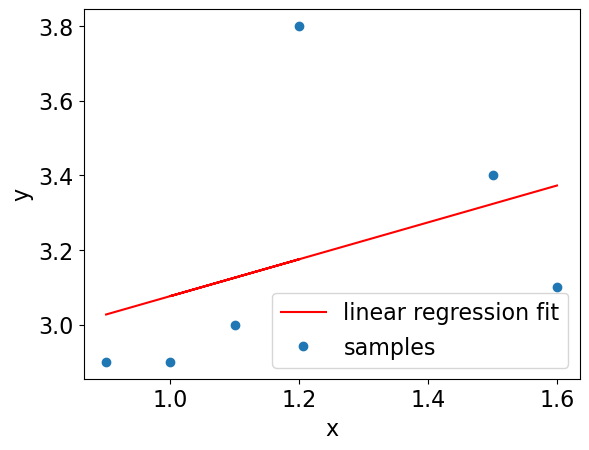

In [36]:
# schetch the linear fit
y_fit = X_linear @ w_linear
plt.plot(X, y_fit, color='r', label = 'linear regression fit')

plt.plot(X, y, 'o', label = 'samples') #scatter plot of samples
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [37]:
# mean squared error for training set
# MSE = np.mean((y - y_fit) ** 2)

MSE = mean_squared_error(y, y_fit)
print("MSE is : " + str(MSE))

MSE is : 0.08895565092989983


In [38]:
# prediction
X_test = np.array([[0.5]])
X_test_linear = linear.fit_transform(X_test)
y_test = X_test_linear @ w_linear
print("y_test is : " + str(y_test))

y_test is : [2.82961373]


### (ii) ###

In [39]:
# Polynomial regression
# X to P
X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]]) # size 6x2
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
order = 3
Poly_3 = PolynomialFeatures(order)
X_Poly_3 = Poly_3.fit_transform(X)
X_Poly_3

array([[1.   , 1.6  , 2.56 , 4.096],
       [1.   , 1.5  , 2.25 , 3.375],
       [1.   , 1.   , 1.   , 1.   ],
       [1.   , 1.1  , 1.21 , 1.331],
       [1.   , 1.2  , 1.44 , 1.728],
       [1.   , 0.9  , 0.81 , 0.729]])

In [40]:
# check if P^T * P is invertible
check_inverse_rank(X_Poly_3.T @ X_Poly_3)
check_inverse_det(X_Poly_3.T @ X_Poly_3)

matrix rank is : 4
matrix size is : (4, 4)
matrix is invertible
determinant is : 1.0138176000538533e-05
matrix is invertible


In [41]:
# learning (work out w)
w_Poly_3 = inv(X_Poly_3.T @ X_Poly_3) @ X_Poly_3.T @ y
print("w_Poly_3 is : " + str(w_Poly_3))

w_Poly_3 is : [ 22.68414579 -57.24284131  53.24384978 -15.71927731]


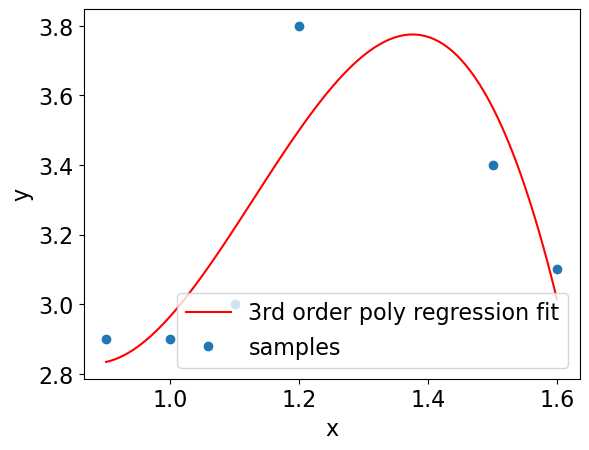

In [42]:
# schetch the Poly_3 fit
x_figs = np.linspace(0.9,1.6,100) # generate 100 evenly spaced numbers between 0.9 and 1.6 (inclusive)
x_figs = x_figs.reshape((100,1)) # convert 1D to 2D arrays for later polynomial transformation.

P_figs_3 = Poly_3.fit_transform(x_figs) # 3rd-order poly feature values
y_figs_Poly_3 = P_figs_3 @ w_Poly_3 # 3rd-order poly regression

plt.plot(x_figs, y_figs_Poly_3, 'r', label = '3rd order poly regression fit')

plt.plot(X, y, 'o', label = 'samples') #scatter plot of samples
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [43]:
# Mean squared error for training set
y_pred_poly3 = X_Poly_3 @ w_Poly_3
MSE = mean_squared_error(y, y_pred_poly3)
print("MSE is : " + str(MSE))

MSE is : 0.0302374391606535


In [44]:
# prediction
X_test_poly3 = Poly_3.fit_transform(X_test)
y_test_poly3 = X_test_poly3 @ w_Poly_3
print("y_test_poly3 is : " + str(y_test_poly3))

y_test_poly3 is : [5.40877791]


### (iii) ###

In [45]:
X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]])
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
order = 6
Poly_6 = PolynomialFeatures(order)

# Data for training
X_Poly_6 = Poly_6.fit_transform(X)

# Data for plotting
x_figs_poly6 = np.linspace(0.9,1.6,100)
x_figs_poly6 = x_figs_poly6.reshape((-1,1))
P_figs_6 = Poly_6.fit_transform(x_figs_poly6)

# Data for testing
X_test_poly6 = Poly_6.fit_transform(X_test)

X_Poly_6

array([[ 1.      ,  1.6     ,  2.56    ,  4.096   ,  6.5536  , 10.48576 ,
        16.777216],
       [ 1.      ,  1.5     ,  2.25    ,  3.375   ,  5.0625  ,  7.59375 ,
        11.390625],
       [ 1.      ,  1.      ,  1.      ,  1.      ,  1.      ,  1.      ,
         1.      ],
       [ 1.      ,  1.1     ,  1.21    ,  1.331   ,  1.4641  ,  1.61051 ,
         1.771561],
       [ 1.      ,  1.2     ,  1.44    ,  1.728   ,  2.0736  ,  2.48832 ,
         2.985984],
       [ 1.      ,  0.9     ,  0.81    ,  0.729   ,  0.6561  ,  0.59049 ,
         0.531441]])

In [46]:
# check if P^T * P is invertible
check_inverse_rank(X_Poly_6.T @ X_Poly_6)
check_inverse_det(X_Poly_6.T @ X_Poly_6)

matrix rank is : 6
matrix size is : (7, 7)
matrix is not invertible
determinant is : -6.734548949042171e-29
matrix is invertible


Computers use floating-point arithmetic, which is approximate.
Operations like addition, subtraction, multiplication, and division introduce rounding errors

w_Poly_6 with λ=0.0001 is : [ 4.64389954 -4.08282769 -1.39058692  3.70437887  3.23921837 -3.85972618
  0.74904689]
MSE with λ=0.0001 is : 0.03302521940415995
y_test_poly6 with λ=0.0001 is : [2.81142488]


w_Poly_6 with λ=0.01 is : [ 1.24705397  0.80007179  0.5514621   0.40513243  0.25526873  0.02199058
 -0.26490027]
MSE with λ=0.01 is : 0.035963889511507696
y_test_poly6 with λ=0.01 is : [1.84809938]


w_Poly_6 with λ=1 is : [ 0.77078441  0.71700193  0.64382161  0.53417314  0.36179229  0.08640449
 -0.35353475]
MSE with λ=1 is : 0.07394385840641632
y_test_poly6 with λ=1 is : [1.37680059]




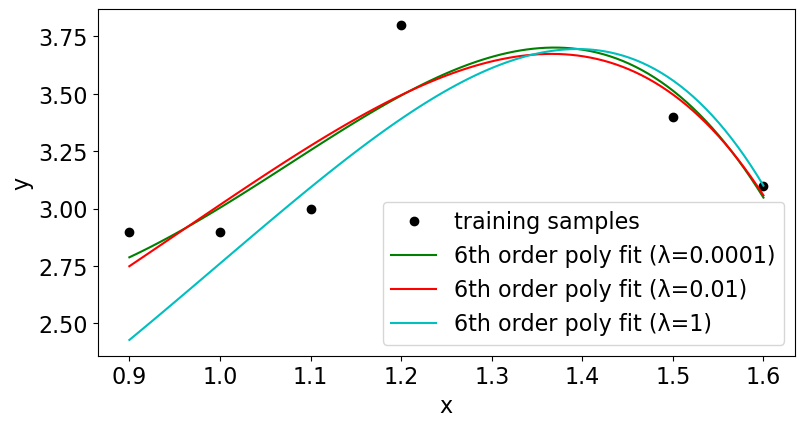

In [47]:
# learning with L2 regularization (work out w)
lamda_list = [0.0001, 0.01, 1]  # try different values of lamda
color_list = ["g", "r", "c"]

plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(X, y, 'o', color='k', label='training samples') 

for color, lamda in zip(color_list, lamda_list):
    # working out weight
    reg_L = lamda*np.identity(X_Poly_6.shape[1])
    w_Poly_6 = inv(X_Poly_6.T @ X_Poly_6 + reg_L) @ X_Poly_6.T @ y
    print(f"w_Poly_6 with λ={lamda} is : " + str(w_Poly_6))
    # MSE for training set
    y_pred_Poly6 = X_Poly_6 @ w_Poly_6
    MSE = mean_squared_error(y, y_pred_Poly6)
    print(f"MSE with λ={lamda} is : " + str(MSE))
    # prediction for test data
    y_test_poly6 = X_test_poly6 @ w_Poly_6
    print(f"y_test_poly6 with λ={lamda} is : " + str(y_test_poly6))
    print("\n")
    # plot
    y_figs_Poly6 = P_figs_6 @ w_Poly_6
    plt.plot(x_figs_poly6, y_figs_Poly6, color=color, label=f'6th order poly fit (λ={lamda})')
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Using libraries

In [48]:
# Linear regression using libraries
from sklearn.linear_model import LinearRegression
X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]])
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
model = LinearRegression() # Automatic intercept: By default, LinearRegression adds the intercept
model.fit(X, y)
print("Model coefficients: " + str(model.coef_))
print("Model intercept: " + str(model.intercept_))

# prediction
print("y_test is : " + str(model.predict(X_test)))


Model coefficients: [0.49356223]
Model intercept: 2.5828326180257513
y_test is : [2.82961373]


In [49]:
# 3rd Polynormial regression using libraries
X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]])
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
order = 3
Poly_3 = PolynomialFeatures(order)
X_Poly_3 = Poly_3.fit_transform(X)

model = LinearRegression(fit_intercept=False)
# fit_intercept=False: when you already augmented 1.
model.fit(X_Poly_3, y)
print("Model coefficients: " + str(model.coef_))
print("Model intercept: " + str(model.intercept_))

# prediction
print("y_test is : " + str(model.predict(X_test_poly3)))

Model coefficients: [ 22.68414579 -57.24284132  53.24384978 -15.71927731]
Model intercept: 0.0
y_test is : [5.40877791]


In [50]:
# 6rd polynormial regression with ridge using libraries
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

X = np.array([[1.6],[1.5], [1.0], [1.1], [1.2], [0.9]])
y = np.array([3.1, 3.4, 2.9, 3.0, 3.8, 2.9])
order = 6
Poly_6 = PolynomialFeatures(order)

lamda = 0.0001

model_ridge = make_pipeline(Poly_6,Ridge(alpha=lamda, fit_intercept=False))  # Poly_6 already includes the bias term,
# therefore fit_intercept=False for Ridge to match the manual implementation.

model_ridge.fit(X, y)
ridge = model_ridge.named_steps['ridge']
# named_steps: a dictionary of all steps in the pipeline.
# model_ridge.named_steps['ridge'] returns the actual Ridge regressor object inside the pipeline
print("Model coefficients: " + str(ridge.coef_))
print("Model intercept: " + str(ridge.intercept_))

# prediction
print("y_test is : " + str(model_ridge.predict(X_test)))

Model coefficients: [ 4.64389954 -4.08282769 -1.39058692  3.70437887  3.23921837 -3.85972618
  0.74904689]
Model intercept: 0.0
y_test is : [2.81142488]
